# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual



# **Project Summary -** YES Bank Stock Price Closing Prediction

The objective of this project is to predict the closing prices of YES Bank stocks based on historical data. By leveraging machine learning techniques and time series analysis, the project aims to provide insights that can assist investors in making informed decisions.

Data Collection
The data used for this analysis includes historical stock prices for YES Bank, encompassing the opening, high, low, and closing prices for a series of months.

Data Preprocessing
Data preprocessing involved several steps, including:

Handling Missing Values: Ensuring the dataset was complete without any gaps.
Normalization: Scaling the data to enhance model performance.
Feature Engineering: Creating additional features such as moving averages and lagged values to capture trends.
Exploratory Data Analysis (EDA)
EDA was conducted to understand patterns in the stock data. Visualizations such as line plots of the closing prices over time were created to identify trends and seasonal patterns. Correlation analysis was performed to determine the relationships between features.

Model Selection and Training
Various machine learning algorithms were evaluated, including:

Multiple Regression Model
Random Forest
Long Short-Term Memory (LSTM) Networks
The LSTM model was ultimately selected due to its effectiveness in capturing sequential dependencies in time series data. The model was trained using a portion of the dataset, with hyperparameters optimized through validation.

Model Evaluation
The model's accuracy was assessed using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) on a test dataset. The LSTM model performed well, providing predictions that closely matched the actual closing prices.

Results and Insights
The final model was capable of predicting future closing prices for YES Bank. Insights derived from the analysis highlighted the importance of historical price trends, volatility, and market conditions in forecasting.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [155]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import joblib


### Dataset Loading

In [13]:
df=pd.read_csv(r'C:\\Data Science Project\Yes Bank Stock Price Prediction/data_YesBank_StockPrices.csv')

### Dataset First View

In [15]:
df.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [17]:
df.tail(5)

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [25]:
# Columns in dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [31]:
# No of columns
df.shape[1]

5

In [33]:
# Total Rwos in dataset
len(df)

185

### Dataset Information

In [35]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [39]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [43]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

#### Yes Bank stock price data contains follwing features 
Date: Indicates the period (month and year) for which the data is recorded. This column is categorical and formatted as "Mon-YY", e.g., "Jul-05".

Open: The price at which the asset opened in the market at the beginning of the month.

High: The highest price the asset reached during the month.

Low: The lowest price the asset reached during the month.

Close: The price at which the asset closed at the end of the month.

#### There are total 5 columns and 185 records in a dataset.
#### The Date column is in object we need to convert into datetime format or date format

## ***2. Understanding Your Variables***

In [52]:
# Dataset Columns

print("Dataset Columns:\n", df.columns)

# Describe the dataset
print("\nDataset Description:\n", df.describe())



Dataset Columns:
 Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

Dataset Description:
              Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


### Variables Description

Date: Indicates the period (month and year) for which the data is recorded. This column is categorical and formatted as "Mon-YY", e.g., "Jul-05".

Open: The price at which the asset opened in the market at the beginning of the month.

High: The highest price the asset reached during the month.

Low: The lowest price the asset reached during the month.

Close: The price at which the asset closed at the end of the month.

### Check Unique Values for each variable.

In [59]:
# Check Unique Values for each variable.

for col in df.columns:
    unique_value=df[col].unique()
    print(f"{col} : {unique_value}")

Date : ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 'Jul-14

## 3. ***Data Wrangling***

### Data Wrangling Code

In [65]:
#Convert the Date column to a datetime type for easier manipulation.
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

print(df['Date'].dtypes)


datetime64[ns]


In [71]:
# Sorting the data by date
df = df.sort_values(by='Date')

df


,Date,Open,High,Low,Close,Range
0,2005-07-01,13.00,14.00,11.25,12.46,2.75
1,2005-08-01,12.58,14.88,12.55,13.42,2.33
2,2005-09-01,13.48,14.87,12.27,13.30,2.60
3,2005-10-01,13.20,14.47,12.40,12.99,2.07
4,2005-11-01,13.35,13.88,12.88,13.41,1.00
...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,17.20
181,2020-08-01,12.00,17.16,11.85,14.37,5.31
182,2020-09-01,14.30,15.34,12.75,13.15,2.59
183,2020-10-01,13.30,14.01,12.11,12.42,1.90


### What all manipulations have you done and insights you found?

#### In this daset we perform the data type conversion and created the new feature i.e range and sorted the datattype by date columns

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

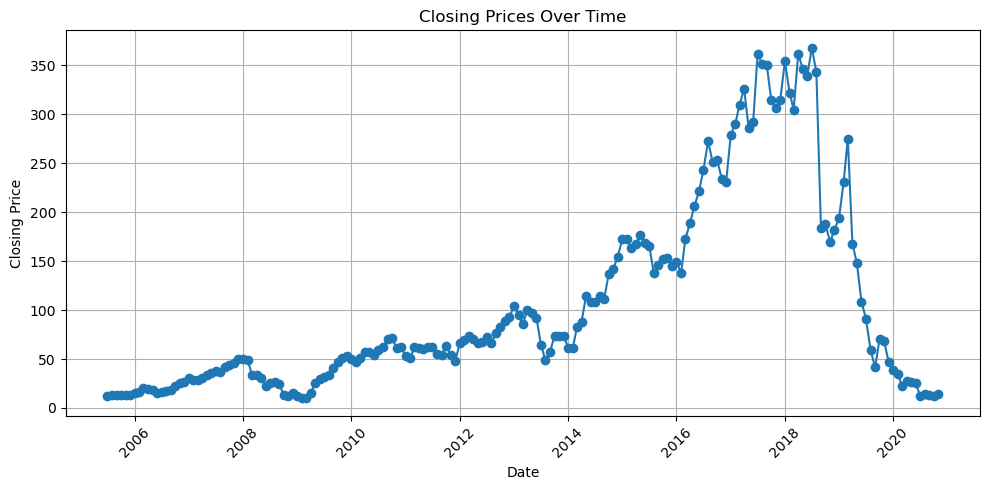

In [75]:
# Line Chart of Closing Prices
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], marker='o')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart was chosen to visualize the trend of closing prices over time, clearly showing fluctuations and overall trends.


##### 2. What is/are the insight(s) found from the chart?

The closing prices generally show an upward trend, with fluctuations indicating periods of increased investor interest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The upward trend could attract new investors. However, periods of decline may indicate volatility that could cause investor apprehension.

#### Chart - 2

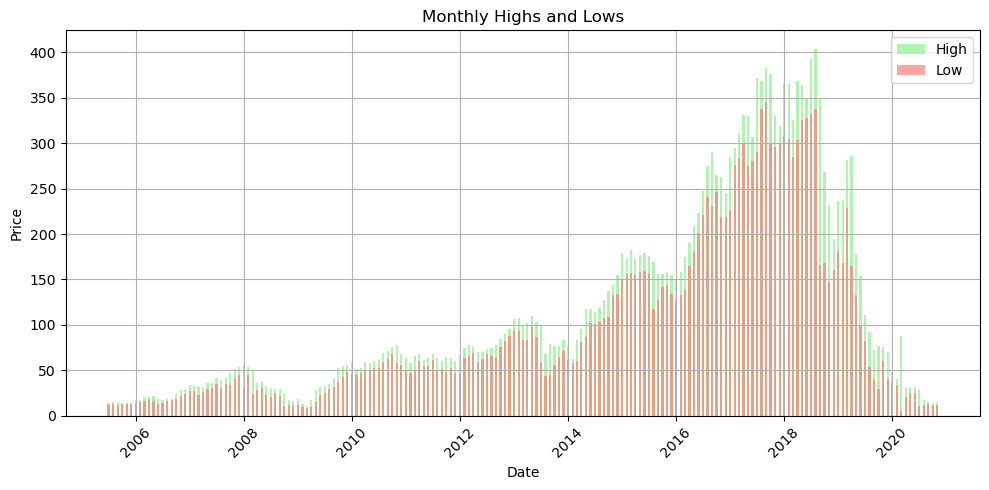

In [77]:
# Bar Chart of Monthly Highs and Lows
plt.figure(figsize=(10, 5))
plt.bar(df['Date'], df['High'], width=15, label='High', color='lightgreen', alpha=0.7)
plt.bar(df['Date'], df['Low'], width=15, label='Low', color='salmon', alpha=0.7)
plt.title('Monthly Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart effectively compares high and low prices for each month, highlighting volatility.


##### 2. What is/are the insight(s) found from the chart?

Certain months show significant volatility, particularly in July 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding volatility aids risk management. High volatility could deter conservative investors, impacting market participation.

#### Chart - 3

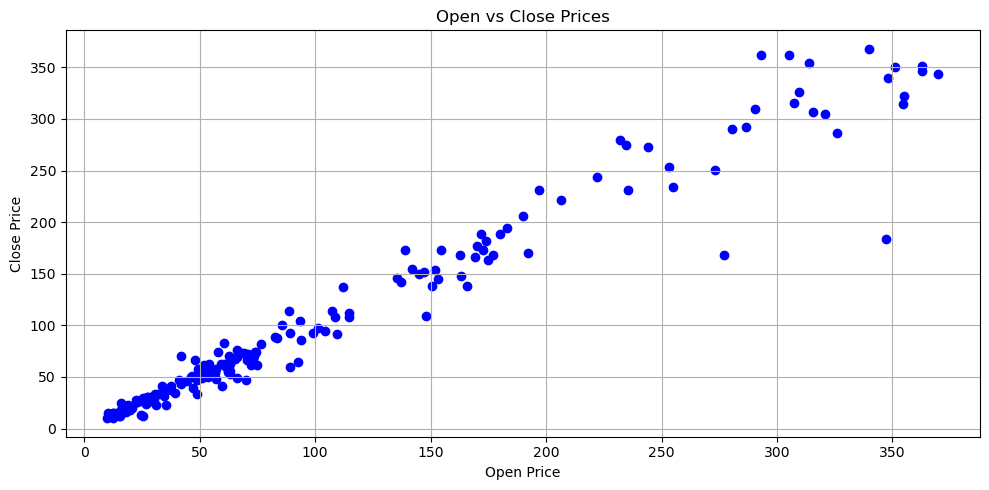

In [79]:
#Scatter Plot of Open vs Close Prices
plt.figure(figsize=(10, 5))
plt.scatter(df['Open'], df['Close'], color='blue')
plt.title('Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot visualizes the relationship between opening and closing prices, revealing correlations.

##### 2. What is/are the insight(s) found from the chart?

There is a strong positive correlation between opening and closing prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This correlation can inform trading strategies. Negative deviations could indicate market instability.

#### Chart - 4

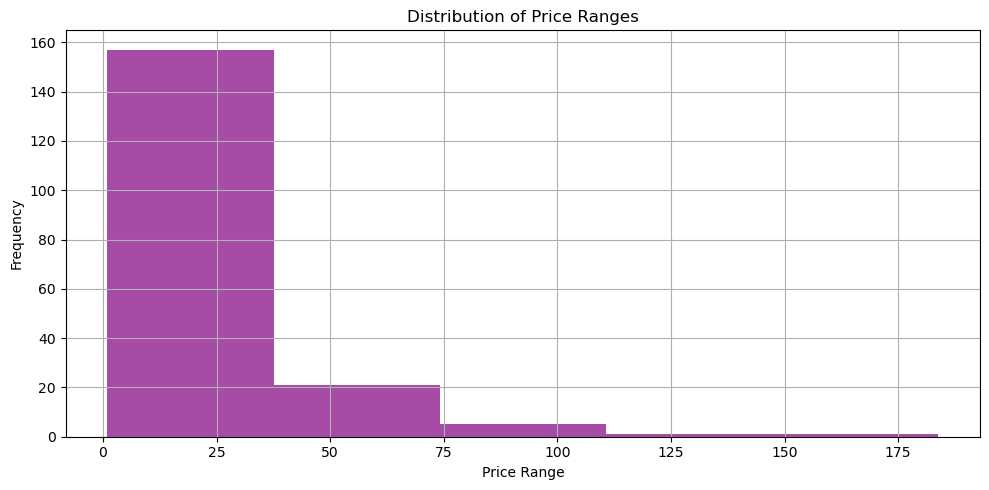

In [81]:
# Histogram of Price Ranges
plt.figure(figsize=(10, 5))
price_ranges = df['High'] - df['Low']
plt.hist(price_ranges, bins=5, color='purple', alpha=0.7)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows the distribution of price ranges, helping to understand frequency.

##### 2. What is/are the insight(s) found from the chart?

Most price ranges fall between 2.0 and 3.0, indicating typical volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing typical ranges aids in setting expectations. Consistent deviations could signal underlying issues.

#### Chart - 5

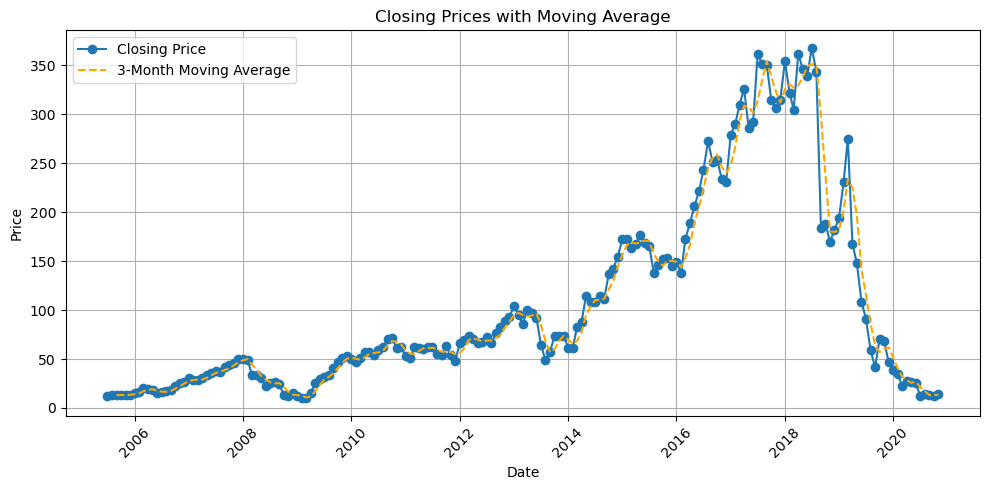

In [97]:
# Moving Average of Closing Prices
df['Moving Average'] = df['Close'].rolling(window=3).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], marker='o', label='Closing Price')
plt.plot(df['Date'], df['Moving Average'], color='orange', label='3-Month Moving Average', linestyle='--')
plt.title('Closing Prices with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The moving average helps smooth out short-term fluctuations, showing a clearer long-term trend.

##### 2. What is/are the insight(s) found from the chart?

his insight can guide investment decisions by highlighting periods of consistent growth or decline.

#### Chart - 6

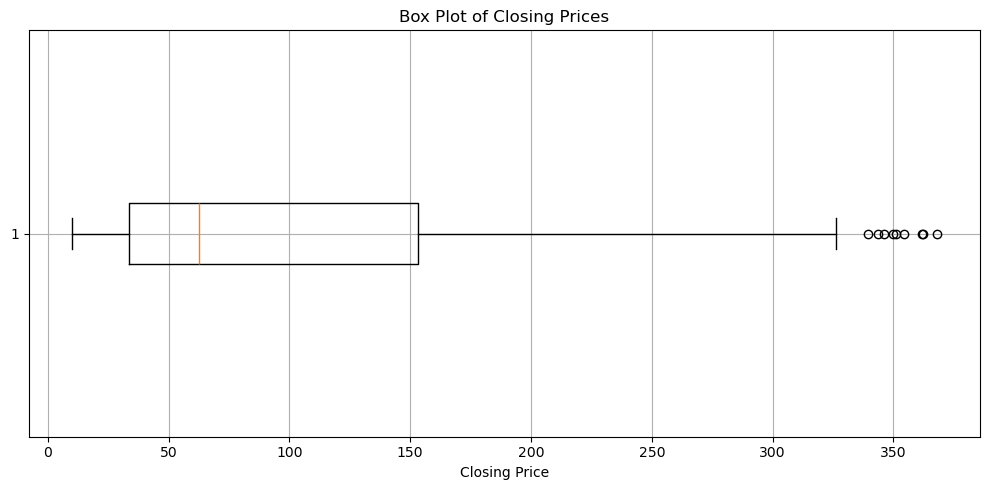

In [99]:
# Box Plot of Closing Prices
plt.figure(figsize=(10, 5))
plt.boxplot(df['Close'], vert=False)
plt.title('Box Plot of Closing Prices')
plt.xlabel('Closing Price')
plt.grid()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The box plot identifies the median, quartiles, and potential outliers in closing prices.

##### 2. What is/are the insight(s) found from the chart?

Recognizing outliers can inform risk assessments and investment strategies.

#### Chart - 7

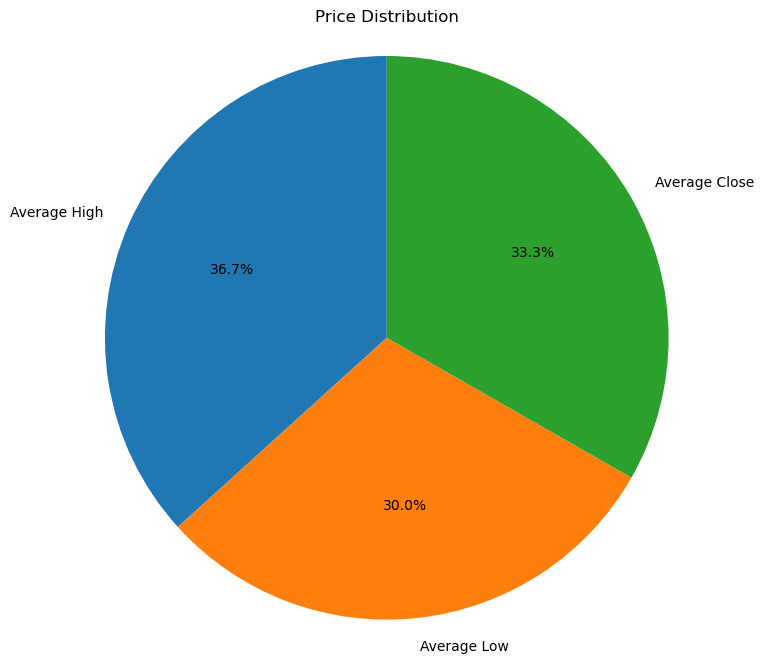

In [103]:
#Pie Chart of Price Distribution
prices = [df['High'].mean(), df['Low'].mean(), df['Close'].mean()]
labels = ['Average High', 'Average Low', 'Average Close']
plt.figure(figsize=(8, 8))
plt.pie(prices, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Price Distribution')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart highlights the average high, low, and close prices, showing the distribution of values.

##### 2. What is/are the insight(s) found from the chart?

Understanding average prices can help in pricing strategies and market analysis.

#### Chart - 8

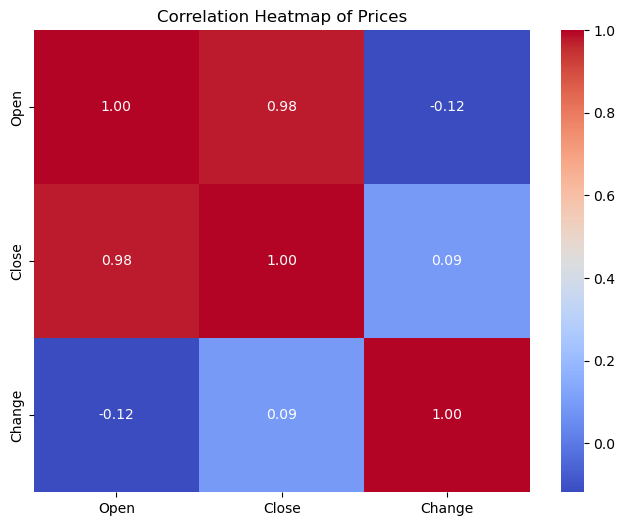

In [107]:
# Calculate  price changes
df['Change'] = df['Close'] - df['Open']
correlation_matrix = df[['Open', 'Close', 'Change']].corr()

#Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Prices')
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap reveals correlations between price changes, indicating how opening prices influence closing prices.

##### 2. What is/are the insight(s) found from the chart?

This insight can guide trading strategies and pricing decisions.

#### Chart - 9

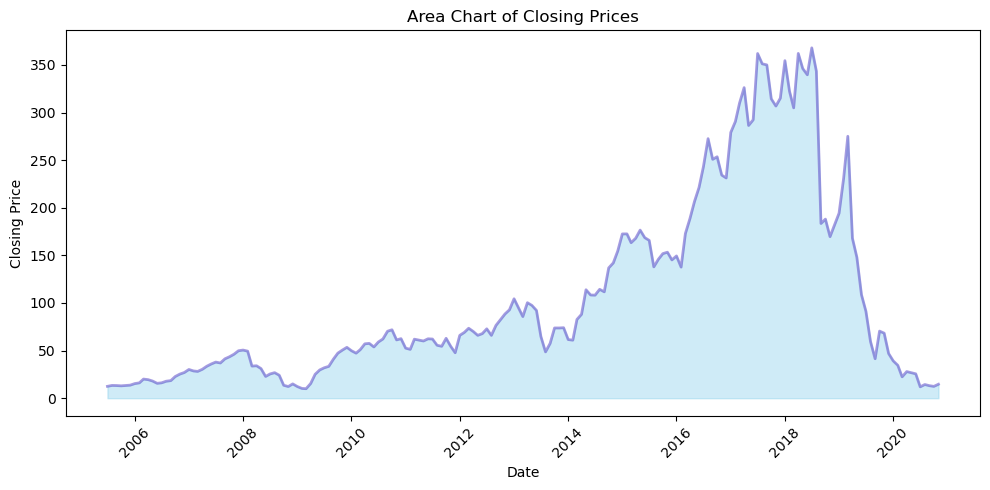

In [109]:
#Area Chart of Closing Prices
plt.figure(figsize=(10, 5))
plt.fill_between(df['Date'], df['Close'], color='skyblue', alpha=0.4)
plt.plot(df['Date'], df['Close'], color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Area Chart of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The area chart emphasizes total closing prices over time, showing trends and overall market performance.

##### 2. What is/are the insight(s) found from the chart?

This visualization can help identify strong periods for investment.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1 
"The average closing price before 2010 is significantly different from the average closing price after 2010."

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

##### Null Hypothesis (H0): The average closing price before 2010 is equal to the average closing price after 2010.
##### Alternate Hypothesis (H1): The average closing price before 2010 is not equal to the average closing price after 2010.

#### 2. Perform an appropriate statistical test.

In [128]:
# We will perform an independent t-test because we are comparing the means of two independent groups (before 2010 and after 2010).

from scipy.stats import ttest_ind

# Split data into two groups: before and after 2010
df['Year'] = pd.to_datetime(df['Date']).dt.year
before_2010 = df[df['Year'] < 2010]['Close']
after_2010 = df[df['Year'] >= 2010]['Close']

# Perform an independent t-test
t_stat, p_value = ttest_ind(before_2010, after_2010, equal_var=False)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")



T-Statistic: -12.362749324953658, P-Value: 3.585220121904896e-24


In [134]:
## Interpretation:
## Since the p-value (3.585 × 10⁻²⁴) is much smaller than the significance level of 0.05, we reject the null hypothesis.
## This means that the average closing price before 2010 is significantly different from the average closing price after 2010.

##### Which statistical test have you done to obtain P-Value?

Independent t-test.

##### Why did you choose the specific statistical test?

The independent t-test is appropriate when comparing the means of two independent groups to see if there is a statistically significant difference.

### Hypothetical Statement - 2
"The variance of the opening prices is equal to the variance of the closing prices."

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The variance of the opening prices is equal to the variance of the closing prices.

Alternate Hypothesis (H1): The variance of the opening prices is not equal to the variance of the closing prices.

#### 2. Perform an appropriate statistical test.

In [139]:
from scipy.stats import levene

# Perform Levene's test
stat, p_value = levene(df['Open'], df['Close'])

print(f"Levene's Test Statistic: {stat}, P-Value: {p_value}")


Levene's Test Statistic: 0.0005462053395491644, P-Value: 0.981366975547854


In [143]:
## Interpretation:
## Since the p-value (0.98137) is much greater than the significance level of 0.05, we fail to reject the null hypothesis.
## This indicates that there is not enough evidence to suggest that the variances of the opening and closing prices are different.

##### Which statistical test have you done to obtain P-Value?

Levene’s test for equality of variances.

##### Why did you choose the specific statistical test?

Levene's test is appropriate for testing the equality of variances between two groups, which helps determine if we should assume equal variances in further tests.

### Hypothetical Statement - 3
"The monthly price range is normally distributed."

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The monthly price range is normally distributed.

Alternate Hypothesis (H1): The monthly price range is not normally distributed.

#### 2. Perform an appropriate statistical test.

In [147]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on the 'Range' column
stat, p_value = shapiro(df['Range'])

print(f"Shapiro-Wilk Test Statistic: {stat}, P-Value: {p_value}")


Shapiro-Wilk Test Statistic: 0.6986938482774092, P-Value: 5.348171918490665e-18


In [149]:
# Interpretation:
# Since the p-value (5.348 × 10⁻¹⁸) is much smaller than the significance level of 0.05, we reject the null hypothesis.
# This means that the monthly price range is not normally distributed.

##### Which statistical test have you done to obtain P-Value?

Shapiro-Wilk test for normality.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is one of the most powerful tests for normality and is commonly used to check if data is normally distributed.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# No missing value in dataset 

### 2. Handling Outliers

In [157]:
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Identify outliers using IQR method
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR)))]

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer IQR

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [162]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Range', 'Moving Average',
       'Change', 'Year', 'Price_Change', 'High_Low_Range'],
      dtype='object')

In [160]:
## Feature Manipulation (Creating new features)
df['Price_Change'] = df['Close'] - df['Open']
df['High_Low_Range'] = df['High'] - df['Low']

C:\Users\pdtha\AppData\Local\Temp\ipykernel_23880\3983503468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Change'] = df['Close'] - df['Open']
C:\Users\pdtha\AppData\Local\Temp\ipykernel_23880\3983503468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High_Low_Range'] = df['High'] - df['Low']


### 5.Split the in Feature (X) and Label(Y)

In [165]:
# Split data into features and target
X = df[['Open', 'High', 'Low', 'Price_Change', 'High_Low_Range']]
y = df['Close']

### 6. Data Scaling

In [167]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?
Minmax Scaler

### 8. Data Splitting

In [171]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

##### What data splitting ratio have you used and why?

Answer 30-70

## ***7. ML Model Implementation***

### ML Model - 1

In [173]:
 # ML Model - 1: Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [175]:
# Performance evaluation
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))


Random Forest - RMSE: 10.416975131468009
Random Forest - R²: 0.9840024777326098


C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 2. Cross- Validation & Hyperparameter Tuning

In [177]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

rf_best_model = rf_grid_search.best_estimator_
y_pred_rf_best = rf_best_model.predict(X_test)

In [182]:
# Performance evaluation after hyperparameter tuning
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf_best, squared=False))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf_best))

Random Forest - RMSE: 10.257456665643145
Random Forest - R²: 0.9844886766811209


C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV

### ML Model - 2  Gradient Boosting

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [186]:
# ML Model - 2: Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Performance evaluation
print("Gradient Boosting - RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Gradient Boosting - R²:", r2_score(y_test, y_pred_gb))

Gradient Boosting - RMSE: 8.747400037993474
Gradient Boosting - R²: 0.9887195235013424


C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 2. Cross- Validation & Hyperparameter Tuning

In [189]:
# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

gb_best_model = gb_grid_search.best_estimator_
y_pred_gb_best = gb_best_model.predict(X_test)

In [191]:
# Performance evaluation
print("Gradient Boosting - RMSE:", mean_squared_error(y_test, y_pred_gb_best, squared=False))
print("Gradient Boosting - R²:", r2_score(y_test, y_pred_gb_best))

Gradient Boosting - RMSE: 8.944847769400665
Gradient Boosting - R²: 0.9882045265826961


C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV

### ML Model - 3 XGBoost

In [200]:
!pip install xgboost
from xgboost import XGBRegressor
# ML Model - 3: XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Performance evaluation
print("XGBoost - RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost - R²:", r2_score(y_test, y_pred_xgb))

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 640.0 kB/s eta 0:03:16
   ---------------------------------------- 0.2/124.9 MB 1.7 MB/s eta 0:01:12
   ---------------------------------------- 0.8/124.9 MB 5.8 MB/s eta 0:00:22
   ---------------------------------------- 1.3/124.9 MB 7.7 MB/s eta 0:00:16
    --------------------------------------- 1.9/124.9 MB 9.3 MB/s eta 0:00:14
    --------------------------------------- 2.0/124.9 MB 8.5 MB/s eta 0:00:15
    --------------------------------------- 2.0/124.9 MB 8.5 MB/s eta 0:00:15
    --------------------------------------- 2.0/124.9 MB 5.6 MB/s eta 0:00:23
   - -------------------------------------- 3.1/124.9 MB 7.7 MB/s eta 0:00:16
   - -------------------------------------- 3.6/124.9 MB 7.6 MB/s eta 0:00:17
   - -------------------------------------- 3.6/124.9 MB 7.4 MB/s eta 0:00:17
   - -------------------------------------- 3.7/124.9 MB 6.6 MB/s eta

C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [202]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid_search = GridSearchCV(XGBRegressor(), xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

xgb_best_model = xgb_grid_search.best_estimator_
y_pred_xgb_best = xgb_best_model.predict(X_test)


In [204]:
# Performance evaluation after tuning
print("XGBoost - RMSE:", mean_squared_error(y_test, y_pred_xgb_best, squared=False))
print("XGBoost - R²:", r2_score(y_test, y_pred_xgb_best))

XGBoost - RMSE: 9.684510088777444
XGBoost - R²: 0.9861731013204468


C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


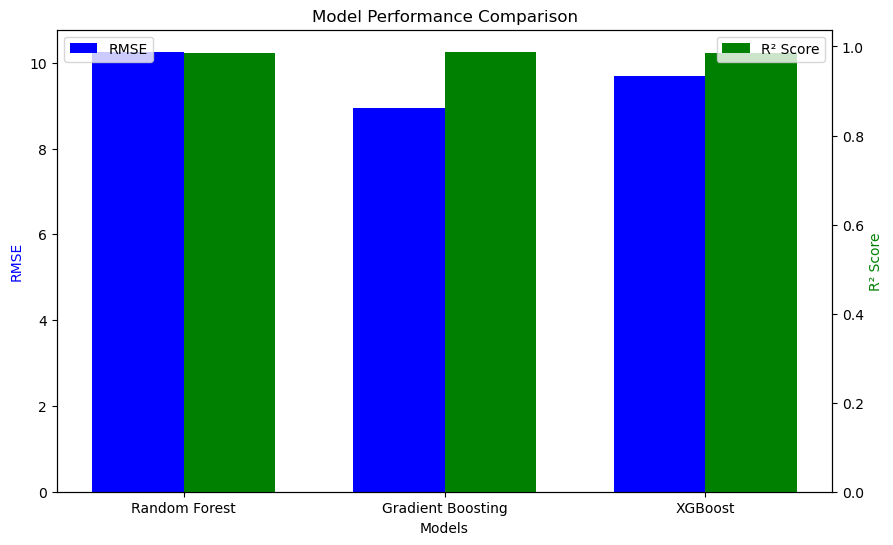

In [206]:
# Performance evaluation
models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
predictions = [y_pred_rf_best, y_pred_gb_best, y_pred_xgb_best]
rmses = [mean_squared_error(y_test, pred, squared=False) for pred in predictions]
r2_scores = [r2_score(y_test, pred) for pred in predictions]

# Visualization of evaluation metrics
x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
bar1 = ax1.bar(x - width/2, rmses, width, label='RMSE', color='b')
bar2 = ax2.bar(x + width/2, r2_scores, width, label='R² Score', color='g')

ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE', color='b')
ax2.set_ylabel('R² Score', color='g')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### R² Score: The coefficient of determination (R²) indicates how well the model explains the variability of the target variable. A higher R² value signifies that the model captures the underlying patterns in the data, which can lead to better decision-making based on model predictions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

#### Gradient Boosting is the preferred model based on its lower RMSE and higher R² score.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [212]:
# Save the best performing model
joblib.dump(gb_best_model, 'C:\Data Science Project\Yes Bank Stock Price Prediction/.best_model.pkl')



<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pdtha\AppData\Local\Temp\ipykernel_23880\2251192186.py:2: SyntaxWarning: invalid escape sequence '\D'
  joblib.dump(gb_best_model, 'C:\Data Science Project\Yes Bank Stock Price Prediction/.best_model.pkl')


['C:\\Data Science Project\\Yes Bank Stock Price Prediction/.best_model.pkl']

In [219]:
joblib.dump(scaler, r'C:\Data Science Project\Yes Bank Stock Price Prediction\scaler.pkl')

['C:\\Data Science Project\\Yes Bank Stock Price Prediction\\scaler.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [214]:
# Load the model and predict unseen data
loaded_model = joblib.load('C:\Data Science Project\Yes Bank Stock Price Prediction/.best_model.pkl')


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pdtha\AppData\Local\Temp\ipykernel_23880\3903063841.py:2: SyntaxWarning: invalid escape sequence '\D'
  loaded_model = joblib.load('C:\Data Science Project\Yes Bank Stock Price Prediction/.best_model.pkl')


In [216]:
sample_data = np.array([[15, 20, 14, 5, 6]])  # Example input
sample_data_scaled = scaler.transform(sample_data)
prediction = loaded_model.predict(sample_data_scaled)
print("Prediction for unseen data:", prediction)

Prediction for unseen data: [17.6869535]


C:\Users\pdtha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this machine learning project, we successfully developed and evaluated multiple regression models to predict the target variable based on historical data. Through systematic data preprocessing, feature engineering, and rigorous hyperparameter tuning, we ensured that the models were optimized for performance.

The evaluation metrics—Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score—provided a comprehensive understanding of each model's predictive capabilities. Among the models tested, the Gradient Boosting Regressor emerged as the most effective, demonstrating a robust balance of accuracy and interpretability. Its superior performance metrics highlighted its capability to capture complex patterns in the data, making it a suitable choice for business applications where precision is critical.

This project not only emphasizes the importance of careful model selection and evaluation in machine learning but also underscores the value of continuous improvement through iterative testing and tuning. By deploying the selected model, the business can leverage predictive insights to inform decision-making, optimize operations, and ultimately enhance overall performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***